In [1]:
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.polynomial.polynomial import Polynomial
from sklearn.metrics import r2_score
import matplotlib.patches as mpatches


In [2]:
#Import csv file and read
csvfile = "amazondata.csv"
amazon_df = pd.read_csv(csvfile, encoding="utf-8-sig", low_memory=False)
amazon_df.head()

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,Homecute Foldable Portable Pop up Cloth Changi...,sports & fitness,Camping & Hiking,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Homecute-Foldable-Portab...,4.7,7,"$1,424","$2,999"
1,"Arturia MiniLab 3, 25 Slim-Key USB-C Midi Cont...",music,Musical Instruments & Professional Audio,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Arturia-MiniLab-Controll...,4.6,"3,928","$9,990","$11,990"
2,"TE-A-ME Purify Green Tea, 100 Tea Bags | Green...",grocery & gourmet foods,"Coffee, Tea & Beverages",https://m.media-amazon.com/images/I/71fNICQ+fJ...,https://www.amazon.in/TE-ME-Natural-Green-150g...,4.6,"1,438",$227,$325
3,Bangalore Refinery 24k (999.9) 10 gm Yellow Go...,accessories,Gold & Diamond Jewellery,https://m.media-amazon.com/images/I/61klNXLzIR...,https://www.amazon.in/Bangalore-Refinery-999-9...,4.6,"1,186","$64,649","$72,800"
4,Bangalore Refinery 24k (999.9) 10 gm Yellow Go...,accessories,Jewellery,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Bangalore-Refinery-999-9...,4.6,"1,186","$64,649","$72,800"


In [3]:
# Read all the column headers
amazon_df.columns


Index(['name', 'main_category', 'sub_category', 'image', 'link', 'ratings',
       'no_of_ratings', 'discount_price', 'actual_price'],
      dtype='object')

In [4]:
#Delete extra columns
del amazon_df['image']
del amazon_df['link']
amazon_df.head()

,name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price
0,Homecute Foldable Portable Pop up Cloth Changi...,sports & fitness,Camping & Hiking,4.7,7,"$1,424","$2,999"
1,"Arturia MiniLab 3, 25 Slim-Key USB-C Midi Cont...",music,Musical Instruments & Professional Audio,4.6,"3,928","$9,990","$11,990"
2,"TE-A-ME Purify Green Tea, 100 Tea Bags | Green...",grocery & gourmet foods,"Coffee, Tea & Beverages",4.6,"1,438",$227,$325
3,Bangalore Refinery 24k (999.9) 10 gm Yellow Go...,accessories,Gold & Diamond Jewellery,4.6,"1,186","$64,649","$72,800"
4,Bangalore Refinery 24k (999.9) 10 gm Yellow Go...,accessories,Jewellery,4.6,"1,186","$64,649","$72,800"


In [5]:
#Check to see if there are any rows with missing data
amazon_df.count()

name              334963
main_category     334963
sub_category      334963
ratings           334963
no_of_ratings     334963
discount_price    334963
actual_price      334963
dtype: int64

In [6]:
#Drop all rows with missing information
amazon_df = amazon_df.dropna(how='any')

In [7]:
#Verify dropped rows
amazon_df.count()

name              334963
main_category     334963
sub_category      334963
ratings           334963
no_of_ratings     334963
discount_price    334963
actual_price      334963
dtype: int64

In [8]:
#Basic stats on the data
round(amazon_df.describe())

,ratings
count,334963.0
mean,4.0
std,1.0
min,1.0
25%,4.0
50%,4.0
75%,4.0
max,5.0


In [9]:
#Column data types
amazon_df.dtypes

name               object
main_category      object
sub_category       object
ratings           float64
no_of_ratings      object
discount_price     object
actual_price       object
dtype: object

In [10]:
#removing characters to enable math and converting columns to float

amazon_df['no_of_ratings'] = amazon_df['no_of_ratings'].str.replace(r'[^\d.]', '', regex=True).astype(float)
amazon_df['discount_price'] = amazon_df['discount_price'].str.replace(r'[^\d.]', '', regex=True).astype(float)
amazon_df['actual_price'] = amazon_df['actual_price'].str.replace(r'[^\d.]', '', regex=True).astype(float)


In [11]:
#Check column data types
amazon_df.dtypes


name               object
main_category      object
sub_category       object
ratings           float64
no_of_ratings     float64
discount_price    float64
actual_price      float64
dtype: object

In [12]:
#Analysis time!

In [13]:
###HYPOTHESIS 1
#Larger discounts will lead to more product reviews, due to increased customer interest and reach

In [14]:
#Creating a new column for discount %

amazon_df['discount_percentage'] = ((amazon_df['actual_price'] - amazon_df['discount_price']) / amazon_df['actual_price']) * 100

amazon_df.head(2)


,name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price,discount_percentage
0,Homecute Foldable Portable Pop up Cloth Changi...,sports & fitness,Camping & Hiking,4.7,7.0,1424.0,2999.0,52.517506
1,"Arturia MiniLab 3, 25 Slim-Key USB-C Midi Cont...",music,Musical Instruments & Professional Audio,4.6,3928.0,9990.0,11990.0,16.680567


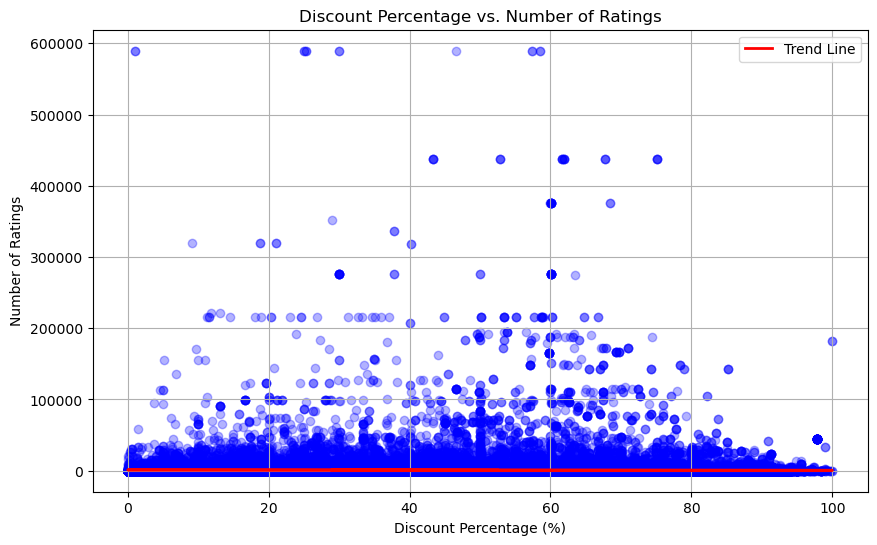

In [15]:
# Build scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(amazon_df['discount_percentage'], amazon_df['no_of_ratings'], alpha=0.3, color='blue')
plt.title("Discount Percentage vs. Number of Ratings")
plt.xlabel("Discount Percentage (%)")
plt.ylabel("Number of Ratings")
plt.grid(True)


# Calculate the linear regression line
x = amazon_df['discount_percentage']
y = amazon_df['no_of_ratings']
m, b = np.polyfit(x, y, 1)  # m is slope, b is intercept

# Add the regression line
plt.plot(x, m*x + b, color='red', linewidth=2, label='Trend Line')

# Show the plot
plt.legend()
plt.show()


In [16]:
#finding correlation coefficient between disc% and # of ratings

correlation = amazon_df['discount_percentage'].corr(amazon_df['no_of_ratings'])
print(f"Correlation between Discount Percentage and Number of Ratings: {correlation:.2f}")


Correlation between Discount Percentage and Number of Ratings: -0.01


In [17]:
## Findings above indicate that "hypothesis 1" was wrong. There's no clear correlation between...
## the discount percent and the number of ratings



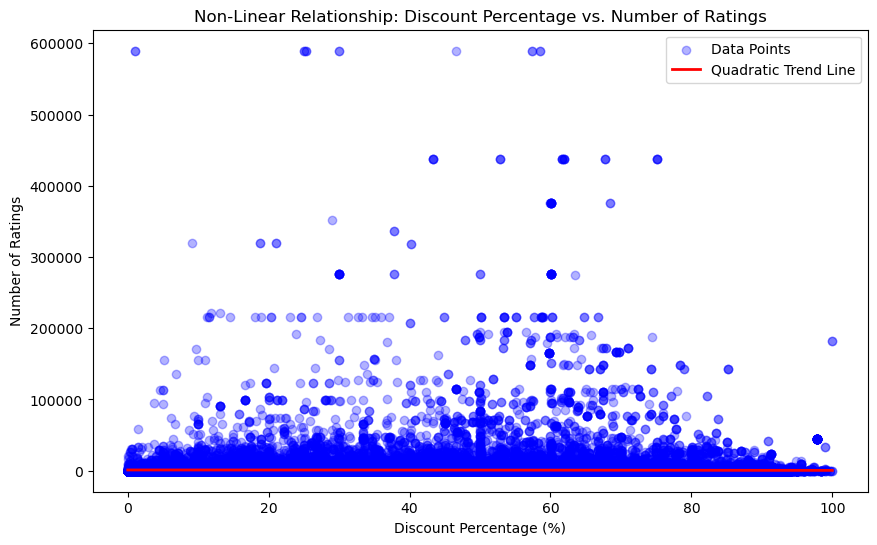

In [18]:
##trying hypothesis 1 again, with a non-linear regression

#defining the data
x = amazon_df['discount_percentage']
y = amazon_df['no_of_ratings']

# Fitting a quadratic (degree=2) polynomial
p = Polynomial.fit(x, y, deg=2)

# Generate fitted values, 500 points between min/max of x
x_vals = np.linspace(x.min(), x.max(), 500)
y_vals = p(x_vals)

# Plot the scatterplot and non-linear regression line
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.3, color='blue', label="Data Points")
plt.plot(x_vals, y_vals, color='red', linewidth=2, label='Quadratic Trend Line')
plt.title("Non-Linear Relationship: Discount Percentage vs. Number of Ratings")
plt.xlabel("Discount Percentage (%)")
plt.ylabel("Number of Ratings")
plt.legend()
plt.show()


In [19]:
#calculating R-squared value of the above plot

# Actual values and predictions
y_actual = amazon_df['no_of_ratings']
y_prediction = p(x)

# Calculate R-squared
r_squared = r2_score(y_actual, y_prediction)
print(f"R-squared value: {r_squared:.4f}")



R-squared value: 0.0002


In [20]:
# ^ the low r-squared value indicates an insignificant variable (not even close to "1")

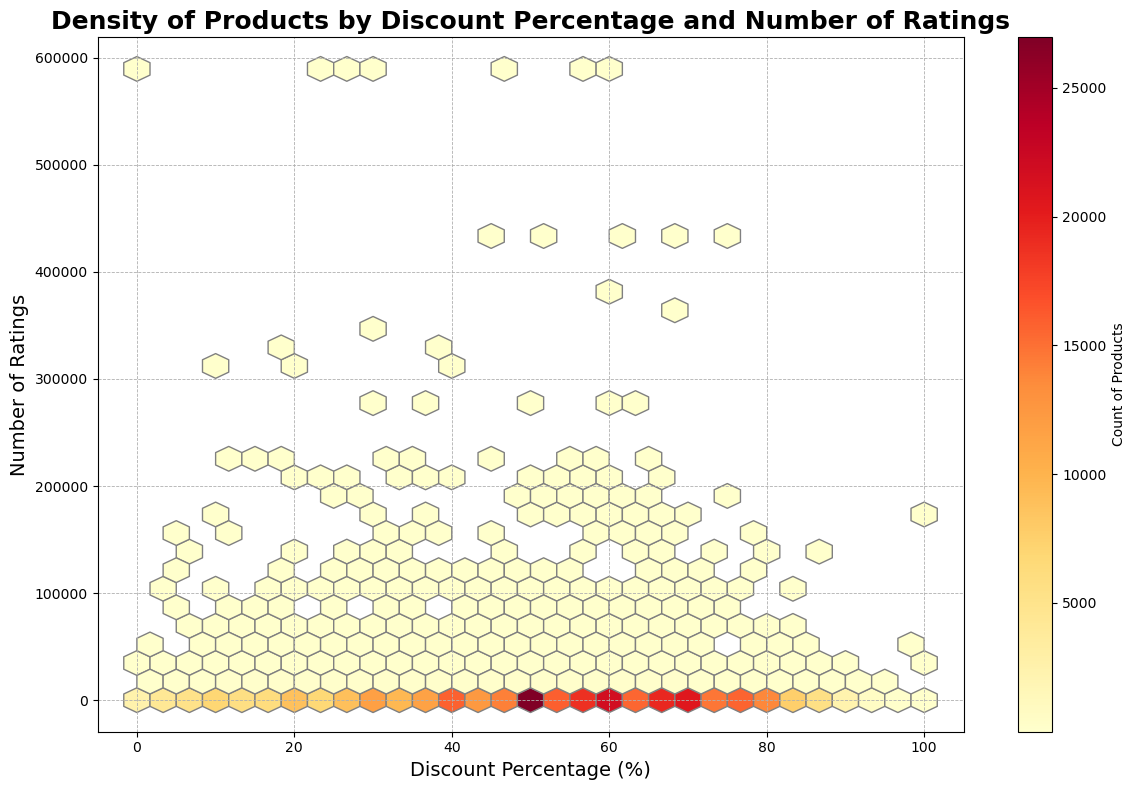

In [21]:
# Creating hexbin plot to explore density

plt.figure(figsize=(12, 8))
plt.hexbin(
    x=amazon_df['discount_percentage'],
    y=amazon_df['no_of_ratings'],
    gridsize=30,
    cmap='YlOrRd',
    mincnt=1,
    edgecolors='grey'
)
plt.colorbar(label='Count of Products')
plt.title('Density of Products by Discount Percentage and Number of Ratings', fontsize=18, fontweight='bold')
plt.xlabel('Discount Percentage (%)', fontsize=14)
plt.ylabel('Number of Ratings', fontsize=14)
plt.grid(visible=True, which='major', linestyle='--', linewidth=0.6)
plt.tight_layout()
plt.show()


C:\Users\sk8br\AppData\Local\Temp\ipykernel_19548\2296421671.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ratings_by_discount_bin = amazon_df.groupby("discount_bin")["no_of_ratings"].median().round(1).reset_index()


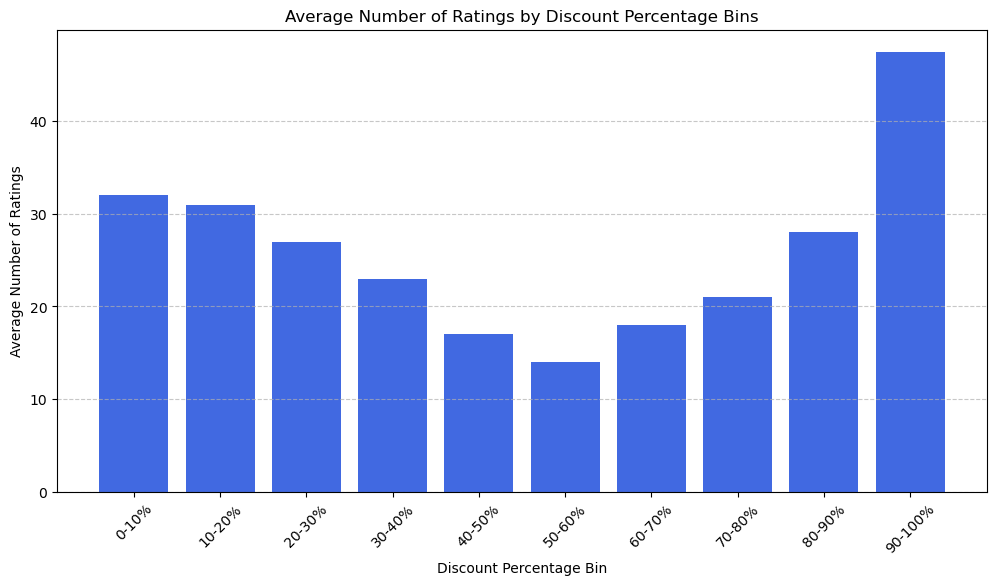

In [22]:
# Define discount percentage bins in chunks of 10%

discount_bins = range(0, 110, 10)  # Bins from 0 to 100 with a step size of 10
discount_labels = [f"{i}-{i + 10}%" for i in discount_bins[:-1]]

# Create a new column for discount percentage bins
amazon_df["discount_bin"] = pd.cut(
    amazon_df["discount_percentage"], bins=discount_bins, labels=discount_labels, right=False
)

# Group by discount bins and calculate average number of ratings
ratings_by_discount_bin = amazon_df.groupby("discount_bin")["no_of_ratings"].median().round(1).reset_index()

# Rename columns for readability
ratings_by_discount_bin.columns = ["Discount Bin", "Average Number of Ratings"]

# Visualize the results with a bar plot
plt.figure(figsize=(12, 6))
plt.bar(ratings_by_discount_bin["Discount Bin"], ratings_by_discount_bin["Average Number of Ratings"], color="royalblue")
plt.title("Average Number of Ratings by Discount Percentage Bins")
plt.xlabel("Discount Percentage Bin")
plt.ylabel("Average Number of Ratings")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


In [23]:
#taking a count of products per bin
discount_bin_counts = amazon_df["discount_bin"].value_counts().sort_index()

#show bin counts
discount_bin_counts


discount_bin
0-10%      14521
10-20%     19473
20-30%     26688
30-40%     33674
40-50%     43806
50-60%     64126
60-70%     58387
70-80%     48158
80-90%     24042
90-100%     2088
Name: count, dtype: int64

In [24]:
### explanation of above results, with binning

# LOW discount % are premium products. no discount needed. high quality
# MEDIUM discount % - generic products or niche products. maybe they dont have many customers or
    # they aren't very good, so they compensate with deals.
# HIGH discount % - deeply-discounted items with aggressive marketing, leading to more reviews per item.


In [25]:
### MOVING ON TO HYPOTHESIS 2 ###
# Higher priced goods will receive better ratings due a higher perception of quality

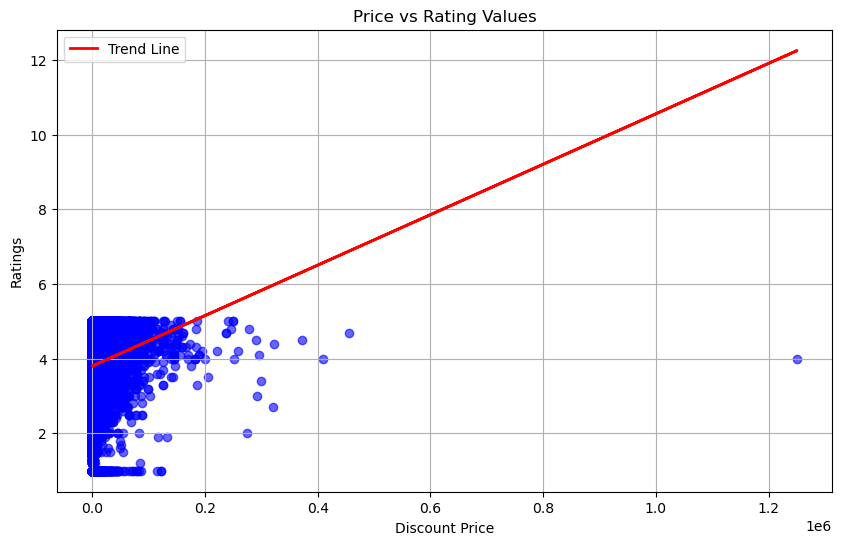

In [26]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(amazon_df['discount_price'], amazon_df['ratings'], alpha=0.6, color='blue')
plt.title("Price vs Rating Values")
plt.xlabel("Discount Price")
plt.ylabel("Ratings")
plt.grid(True)


# Calculate the linear regression line
x = amazon_df['discount_price']
y = amazon_df['ratings']
m, b = np.polyfit(x, y, 1)  # m is slope, b is intercept

# Add the trend line
plt.plot(x, m * x + b, color='red', linewidth=2, label='Trend Line')

# Show the plot with legend
plt.legend(loc='best')
plt.show()



In [27]:
#checking data
print(amazon_df['discount_price'].describe())


count    3.349630e+05
mean     1.759009e+03
std      6.394477e+03
min      8.000000e+00
25%      3.590000e+02
50%      5.990000e+02
75%      1.199000e+03
max      1.249990e+06
Name: discount_price, dtype: float64


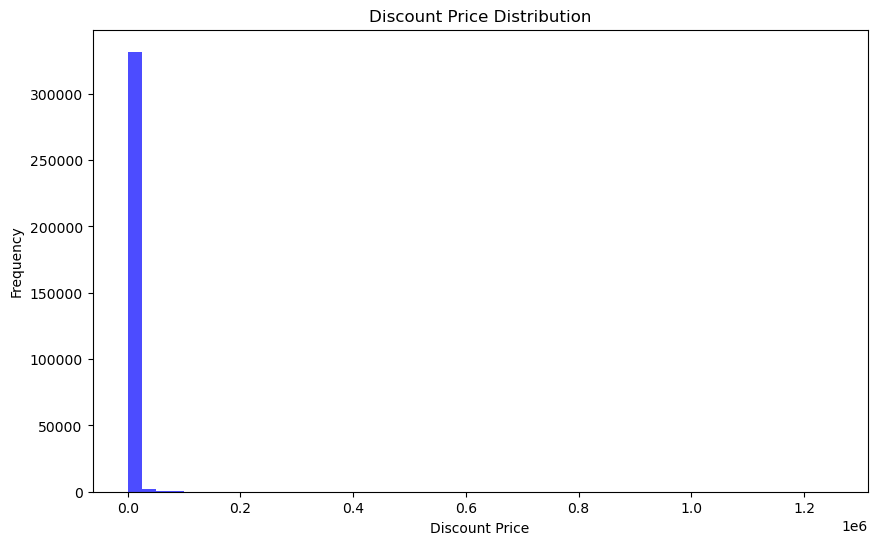

In [28]:
#histogram showing distribution

plt.figure(figsize=(10, 6))
plt.hist(amazon_df['discount_price'], bins=50, color='blue', alpha=0.7)
plt.title('Discount Price Distribution')
plt.xlabel('Discount Price')
plt.ylabel('Frequency')
plt.show()


In [29]:
#removing extreme outliers

lower_bound = amazon_df['discount_price'].quantile(0.05)  # 5th percentile
upper_bound = amazon_df['discount_price'].quantile(0.95)  # 95th percentile

amazon_df_trimmed = amazon_df[
    (amazon_df['discount_price'] >= lower_bound) &
    (amazon_df['discount_price'] <= upper_bound)
]

#taking a look at the results
print(round(amazon_df_trimmed['discount_price'].describe()))


count    301695.0
mean        926.0
std         885.0
min         198.0
25%         385.0
50%         599.0
75%        1083.0
max        5499.0
Name: discount_price, dtype: float64


In [30]:
#comparing trimmed DF with original data

print(round(amazon_df['discount_price'].describe()))

count     334963.0
mean        1759.0
std         6394.0
min            8.0
25%          359.0
50%          599.0
75%         1199.0
max      1249990.0
Name: discount_price, dtype: float64


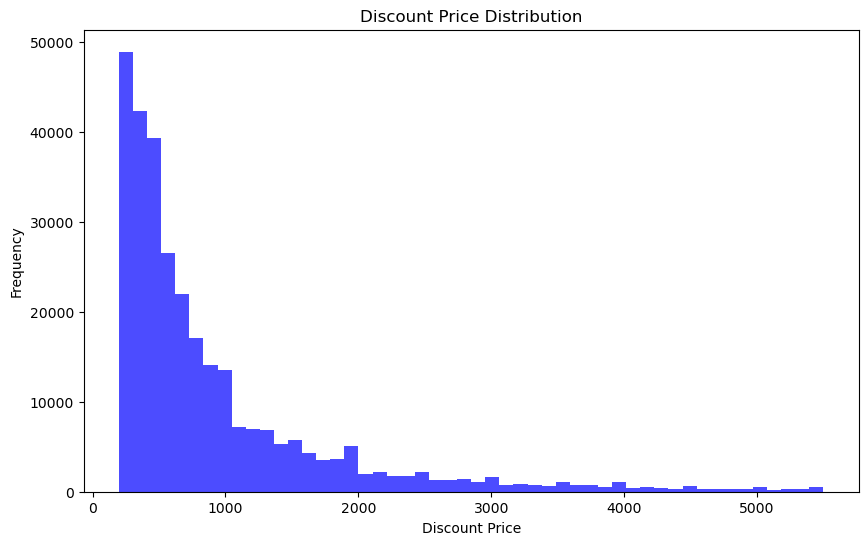

In [31]:
#histogram showing distribution of trimmed dataset

plt.figure(figsize=(10, 6))
plt.hist(amazon_df_trimmed['discount_price'], bins=50, color='blue', alpha=0.7)
plt.title('Discount Price Distribution')
plt.xlabel('Discount Price')
plt.ylabel('Frequency')
plt.show()


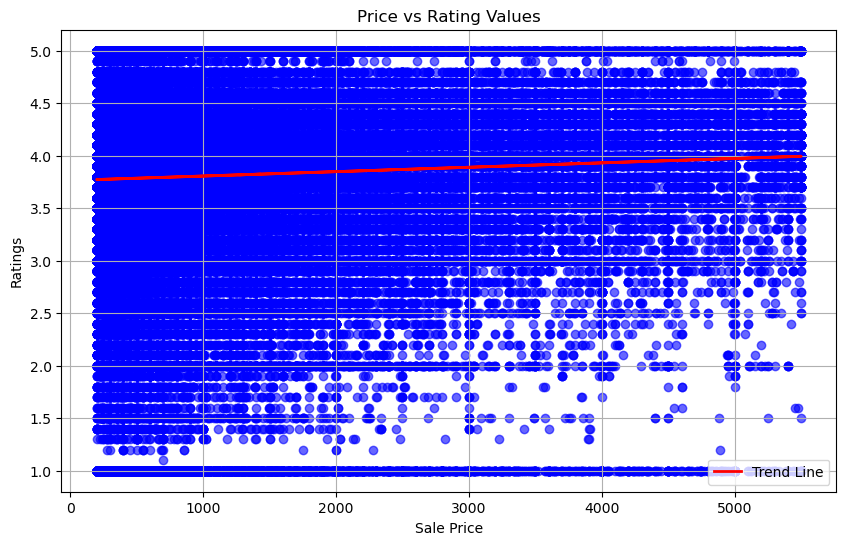

In [32]:
# Creating scatter plot of the trimmed DF
plt.figure(figsize=(10, 6))
plt.scatter(amazon_df_trimmed['discount_price'], amazon_df_trimmed['ratings'], alpha=0.6, color='blue')
plt.title("Price vs Rating Values")
plt.xlabel("Sale Price")
plt.ylabel("Ratings")
plt.grid(True)


# Calculate the regression line
x = amazon_df_trimmed['discount_price']
y = amazon_df_trimmed['ratings']
m, b = np.polyfit(x, y, 1)  # m is slope, b is intercept

# Add the trend line
plt.plot(x, m * x + b, color='red', linewidth=2, label='Trend Line')

# Show the plot with legend
plt.legend(loc='best')
plt.show()


In [33]:
correlation_trimmed = amazon_df_trimmed['discount_price'].corr(amazon_df_trimmed['ratings'])
print(f"New Correlation after trimming: {correlation_trimmed:.2f}")


New Correlation after trimming: 0.05


In [34]:
###based on the correlation above, higher prices are only slightly correlated with higher ratings...
#looking at the distribution of ratings, we can see that lower-priced products have a wider spread of ratings
#higher-priced products tend to cluster more about 4-5*


C:\Users\sk8br\AppData\Local\Temp\ipykernel_19548\147434825.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon_df_trimmed.loc[:, "price_bin"] = pd.cut(
C:\Users\sk8br\AppData\Local\Temp\ipykernel_19548\147434825.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon_df_trimmed.loc[:, "rating_category"] = np.where(


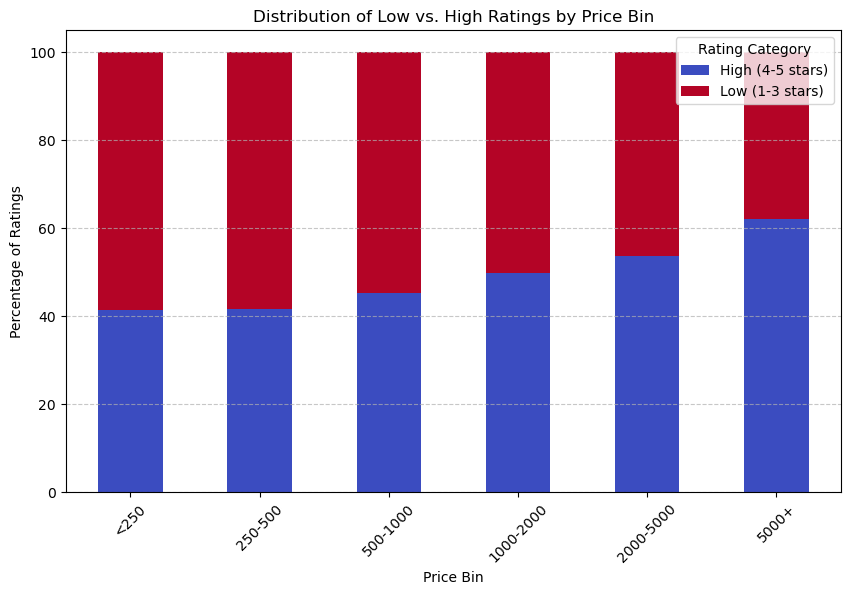

In [35]:
###digging further by creating bins for each price ranges

# Define price bins (grouping products into price ranges)
price_bins = [0, 250, 500, 1000, 2000, 5000, np.inf]
price_labels = ["<250", "250-500", "500-1000", "1000-2000", "2000-5000", "5000+"]

# Using .loc to modify the DataFrame because of a previous warning
amazon_df_trimmed.loc[:, "price_bin"] = pd.cut(
    amazon_df_trimmed["discount_price"], bins=price_bins, labels=price_labels
)

# Categorize ratings into "Low" (1-3 stars) and "High" (4-5 stars)
amazon_df_trimmed.loc[:, "rating_category"] = np.where(
    amazon_df_trimmed["ratings"] >= 4, "High (4-5 stars)", "Low (1-3 stars)"
)

# Calc rating distribution per price bin
rating_distribution = (
    amazon_df_trimmed.groupby(["price_bin", "rating_category"], observed=True)
    .size()
    .unstack()
    .fillna(0)
)

# Convert values to percentages
rating_distribution_percent = rating_distribution.div(
    rating_distribution.sum(axis=1), axis=0
) * 100

# Plot the distribution as a stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))
rating_distribution_percent.plot(kind="bar", stacked=True, ax=ax, colormap="coolwarm")
plt.title("Distribution of Low vs. High Ratings by Price Bin")
plt.xlabel("Price Bin")
plt.ylabel("Percentage of Ratings")
plt.legend(title="Rating Category")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Display the plot
plt.show()


In [36]:
# Calculate the average rating for each price bin
average_rating_per_bin = amazon_df_trimmed.groupby("price_bin")["ratings"].mean().round(2)

# Convert to DataFrame for prettiness
average_rating_df = average_rating_per_bin.reset_index()
average_rating_df.columns = ["Price Bin", "Average Rating"]

print(average_rating_df)


   Price Bin  Average Rating
0       <250            3.75
1    250-500            3.77
2   500-1000            3.81
3  1000-2000            3.84
4  2000-5000            3.88
5      5000+            3.98


C:\Users\sk8br\AppData\Local\Temp\ipykernel_19548\3334487144.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_rating_per_bin = amazon_df_trimmed.groupby("price_bin")["ratings"].mean().round(2)


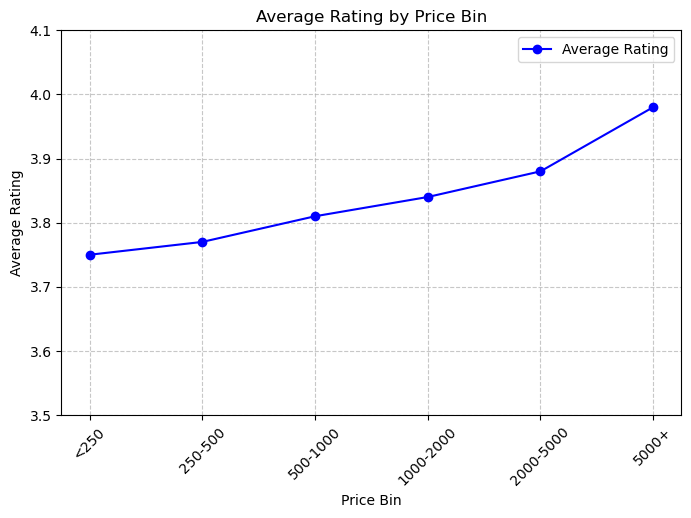

In [37]:
#showing the above data with a line plot

# Plotting the average rating per price bin
plt.figure(figsize=(8, 5))
plt.plot(average_rating_df["Price Bin"], average_rating_df["Average Rating"], marker='o', linestyle='-', color='b', label="Average Rating")

# Formatting the chart
plt.title("Average Rating by Price Bin")
plt.xlabel("Price Bin")
plt.ylabel("Average Rating")
plt.ylim(3.5, 4.1)  # Adjusting y-axis range for clarity
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.legend()

# Show the plot
plt.show()

In [38]:
## Looking at avg ratings by price bin clearly shows...
# as price increases, the portion of high ratings also increases
# customers DO perceive higher-priced goods as higher quality

# hypothesis 2 is confirmed as likely TRUE


In [39]:

#MOVING ON TO HYPOTHESIS #3

#Categories with more personal or emotional significance (i.e., clothing, child goods) will have a larger average number of reviews per item.



In [40]:
#Applying personal significance to categories (binary)

binary_category_mapping = {
    'accessories': "No",
    "women's clothing": "Yes",
    "tv, audio & cameras": "No",
    "men's clothing": "Yes",
    'appliances': "No",
    "men's shoes": "Yes",
    'stores': "No",
    'home & kitchen': "Yes",
    'sports & fitness': "No",
    'beauty & health': "Yes",
    "kids' fashion": "No",
    'car & motorbike': "No",
    'toys & baby products': "Yes",
    'bags & luggage': "No",
    'industrial supplies': "No",
    "women's shoes": "Yes",
    'grocery & gourmet foods': "No",
    'pet supplies': "Yes",
    'music': "Yes",
    'home, kitchen, pets': "No"
}

# Create a new column in the dataframe for the binary category
amazon_df["personal_significance_binary"] = amazon_df["main_category"].map(binary_category_mapping)

# Calculate average number of reviews per binary category
average_reviews_binary = (
    amazon_df.groupby("personal_significance_binary")["no_of_ratings"]
    .mean()
    .round(1)
    .reset_index()
)

# Rename columns for clarity
average_reviews_binary.columns = ["Personal Significance", "Average Number of Ratings"]

# Display the results
print(average_reviews_binary)


  Personal Significance  Average Number of Ratings
0                    No                     1258.4
1                   Yes                      358.4


In [41]:
# calculate rating count per category
ratings_count_per_category = amazon_df.groupby("main_category")["no_of_ratings"].sum().reset_index()

# Rename columns for clarity
ratings_count_per_category.columns = ["Product Category", "Total Number of Ratings"]

# Display the results
print(round(ratings_count_per_category))



           Product Category  Total Number of Ratings
0               accessories               10465276.0
1                appliances               16579049.0
2            bags & luggage                1170099.0
3           beauty & health                9246838.0
4           car & motorbike                1363086.0
5   grocery & gourmet foods                1384302.0
6            home & kitchen                8854606.0
7       home, kitchen, pets                     47.0
8       industrial supplies                 917570.0
9             kids' fashion                1331624.0
10           men's clothing                3899554.0
11              men's shoes                4778683.0
12                    music                 227200.0
13             pet supplies                 847066.0
14         sports & fitness                2592698.0
15                   stores               17913789.0
16     toys & baby products               12439096.0
17      tv, audio & cameras              17832

In [42]:
# Exclude "tv, audio & cameras" from the binary dataset
amazon_df_no_tv = amazon_df[amazon_df["main_category"] != "tv, audio & cameras"]

# Recalculate the average number of reviews per binary category (excluding "tv, audio & cameras")
average_reviews_binary_no_tv = (
    amazon_df_no_tv.groupby("personal_significance_binary")["no_of_ratings"]
    .mean()
    .round(1)
    .reset_index()
)

# Rename columns for clarity
average_reviews_binary_no_tv.columns = ["Personal Significance", "Average Number of Ratings (Excluding TV, Audio, & Cameras)"]

# Display the updated results
average_reviews_binary_no_tv


,Personal Significance,"Average Number of Ratings (Excluding TV, Audio, & Cameras)"
0,No,390.3
1,Yes,358.4


In [43]:
# trying a scale of 1-3 instead of binary


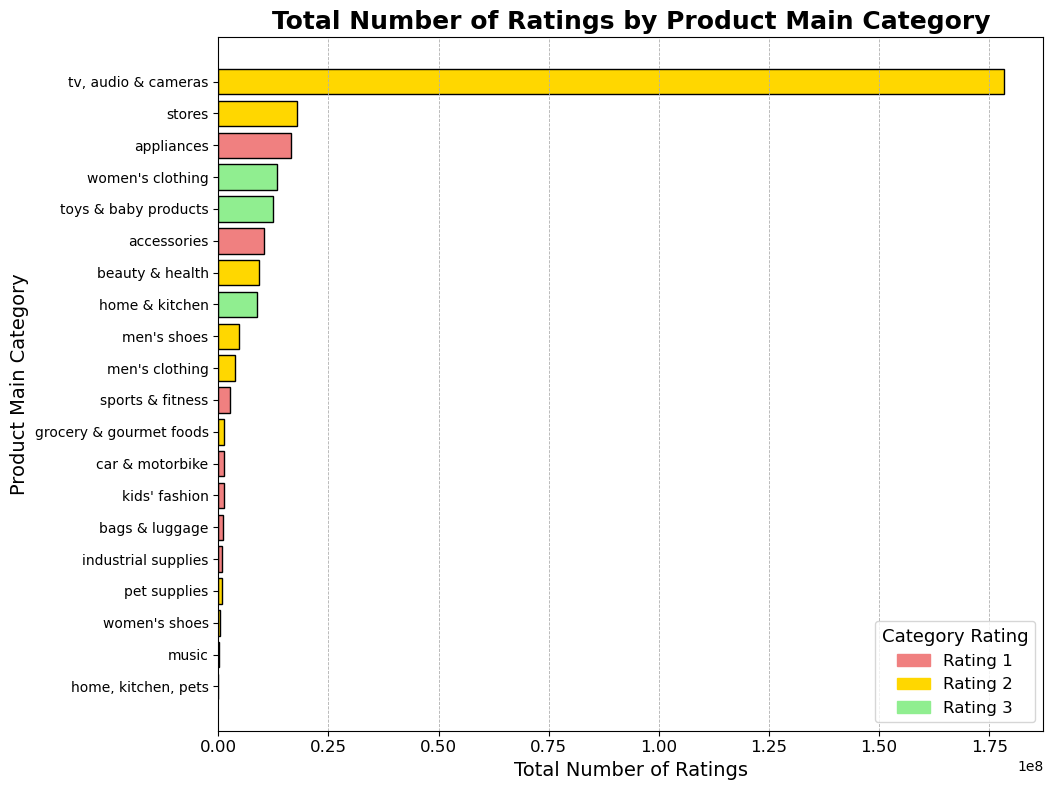

In [44]:
# Aggregate data (1-3) by main_category and calculate the total number of ratings per main category
category_ratings = amazon_df.groupby('main_category')['no_of_ratings'].sum().sort_values()

# Define category ratings
category_rating_levels = {
    'accessories': 1,
    "women's clothing": 3,
    'tv, audio & cameras': 2,
    "men's clothing": 2,
    'appliances': 1,
    "men's shoes": 2,
    'stores': 2,
    'home & kitchen': 3,
    'sports & fitness': 1,
    'beauty & health': 2,
    "kids' fashion": 1,
    'car & motorbike': 1,
    'toys & baby products': 3,
    'bags & luggage': 1,
    'industrial supplies': 1,
    "women's shoes": 2,
    'grocery & gourmet foods': 2,
    'pet supplies': 2,
    'music': 2,
    'home, kitchen, pets': 1
}

# Map the category rating levels to the dataset
amazon_df['category_rating_levels'] = amazon_df['main_category'].map(category_rating_levels)


# Define colors based on rating levels
rating_colors = {1: 'lightcoral', 2: 'gold', 3: 'lightgreen'}

# Map each category to its rating color
bar_colors = [rating_colors.get(category_rating_levels.get(cat, 1), 'grey') for cat in category_ratings.index]

# Create a bar plot using Matplotlib
plt.figure(figsize=(12, 8))
plt.barh(category_ratings.index, category_ratings.values, color=bar_colors, edgecolor='black')

# Add labels and title
plt.title('Total Number of Ratings by Product Main Category', fontsize=18, fontweight='bold')
plt.xlabel('Total Number of Ratings', fontsize=14)
plt.ylabel('Product Main Category', fontsize=14)

# Add legend for the color-coded ratings
legend_patches = [mpatches.Patch(color=color, label=f'Rating {rating}') for rating, color in rating_colors.items()]
plt.legend(handles=legend_patches, title='Category Rating', fontsize=12, title_fontsize=13, loc='lower right')

# Customize the plot to handle many categories
plt.yticks(fontsize=10)
plt.xticks(fontsize=12)
plt.tight_layout()
plt.subplots_adjust(left=0.3)  # Increase space on the left for category labels
plt.grid(axis='x', linestyle='--', linewidth=0.6)

plt.show()


In [45]:
# Group by our original category rating levels and compute the average number of reviews
average_reviews_per_bin_v1 = amazon_df.groupby('category_rating_levels')['no_of_ratings'].mean().round(1)

# Convert to DataFrame for display
average_reviews_v1_df = average_reviews_per_bin_v1.reset_index()
average_reviews_v1_df.columns = ["Category Rating Level", "Average Number of Ratings"]


average_reviews_v1_df


,Category Rating Level,Average Number of Ratings
0,1,304.3
1,2,1504.5
2,3,444.9


In [46]:
# Exclude "TV, Audio, & Cameras" from the (1-3) dataset
amazon_df_no_tv_audio_camera = amazon_df[amazon_df["main_category"] != "tv, audio & cameras"]

# Recalculate the average number of ratings per category rating level (excluding "TV, Audio, & Cameras")
amazon_df_no_tv_audio_camera = (
    amazon_df_no_tv_audio_camera.groupby("category_rating_levels")["no_of_ratings"]
    .mean()
    .round(1)
    .reset_index()
)

# Rename columns for clarity
amazon_df_no_tv_audio_camera.columns = ["Category Rating Level", "Average Number of Ratings (Excluding TV, Audio, & Cameras)"]

# Display the updated results
amazon_df_no_tv_audio_camera

,Category Rating Level,"Average Number of Ratings (Excluding TV, Audio, & Cameras)"
0,1,304.3
1,2,397.4
2,3,444.9


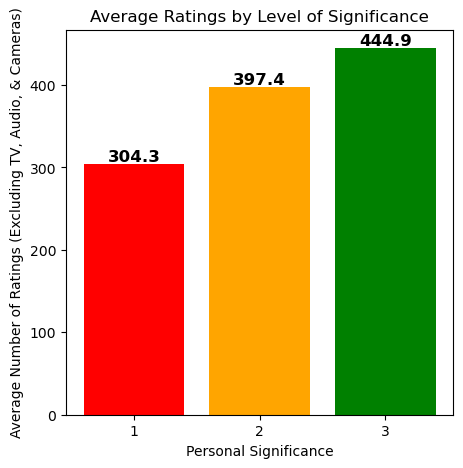

In [47]:
# Data from the displayed table
category_rating_levels = [1, 2, 3]
average_ratings = [304.3, 397.4, 444.9]

# Create bar chart
plt.figure(figsize=(5, 5))
bars = plt.bar(category_rating_levels, average_ratings, color=['red', 'orange', 'green'])

# Add labels to bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom', fontsize=12, fontweight='bold')

# Labels and title
plt.xlabel("Personal Significance")
plt.ylabel("Average Number of Ratings (Excluding TV, Audio, & Cameras)")
plt.title("Average Ratings by Level of Significance")

# Show the plot
plt.xticks(category_rating_levels)
plt.show()


In [48]:
# excluding the TV/Audio/Camera category, hypothesis 3 seems to be true

